In [174]:
from sympy import symbols, solve, N, cos, sin, pi, sqrt, Poly
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tttt
def cosT(x):
    return 1 - x**2/2 + x**4/24 - x**6/720
def sinT(x):
    return x - x**3/6 + x**5/120

g=9.81
theta = 20*np.pi/180
nN=10
nmax=0.3

aR=0.1065
mR=1.5
dR=0.3265
alphaR=20*np.pi/180

m, d, k = symbols('m d k', positive=True, real=True)
solutions = solve([m*g/4*d*sin(-alphaR+pi/3)*2+2*0.5*k*(alphaR**2)-m*g/4*d*sin(pi/3)*2], k, dict=True)
kR = float(N(solutions[0][k].evalf(subs={m:mR, d:dR}),3))
print(f"m: {mR}kg, d: {dR}m, angle offset: {np.rad2deg(float(alphaR))}deg, k: {kR}N/m")

a, bma0, c = symbols('a bma c', positive=True, real=True) #bma = b-a
F, gamma = symbols('F gamma', positive=True, real=True)
bF = [0]*nN
cF = [0]*nN
nF = [0]*nN
fF = [0]*nN
for i in range(nN):
    n = np.logspace(0, 1, nN)[i]/10*nmax
    print(n)
    nF[i] = n
    eqs = [a**2+(a+bma)**2-2*a*(a+bma)*cosT((pi/3)-alphaR)-c**2,
        a**2+(a+bma)**2-2*a*(a+bma)*cosT((pi/3)-theta-alphaR)-(c*(1-n))**2]
    solutions = solve(eqs, [c, bma], dict=True)
    bF[i] = solutions[0][bma].evalf(subs={a:aR}) + aR
    cF[i] = solutions[0][c].evalf(subs={a:aR})
    solutions = solve([theta*kR-F*aR*sin(gamma), -bF[i]**2+aR**2+(cF[i]*(1-n))**2-2*aR*cF[i]*(1-n)*cos(gamma)], [F, gamma], dict=True)
    fF[i] = N(solutions[0][F].evalf(), 3)


m: 1.5kg, d: 0.3265m, angle offset: 20.0deg, k: 4.4013671875N/m
0.03
0.038746489950446515
0.05004301611600176
0.06463304070095652
0.08347678206621373
0.10781440991413882
0.13924766500838334
0.17984527509568224
0.23227910480433805
0.3


In [195]:
prequired = [0]*nN
for i in range(nN):
    D0 = 0.015
    mesh_angle = np.pi/4
    prequired[i] = 4*fF[i]/ (np.pi*(D0**2)*(3*(np.cos(mesh_angle)**2)-1)* 101325)
    

36.8
35.6
34.2
32.6
30.8
28.9
26.8
24.5
22.0
19.4


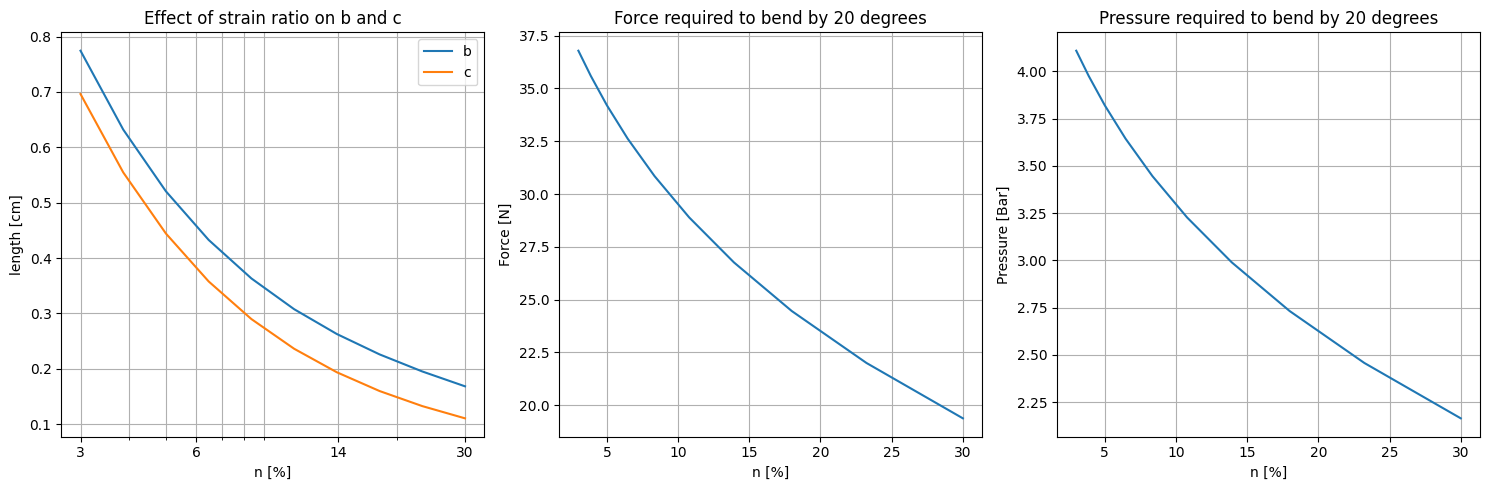

In [197]:
import matplotlib.ticker as tttt

plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
ax.plot(100*np.array(nF), bF, label='b')
ax.plot(100*np.array(nF), cF, label='c')
ax.set_title('Effect of strain ratio on b and c')
ax.set_xlabel('n [%]')
ax.set_xscale('log')
ax.set_ylabel('length [cm]')
ax.legend()
ax.set_xticks(np.round(np.logspace(0, 1, 4)/10*nmax*100))
ax.get_xaxis().set_major_formatter(tttt.ScalarFormatter())
ax.grid(which='both')

ax = plt.subplot(1, 3, 2)
ax.plot(100*np.array(nF), fF, label='F')
ax.set_xlabel('n [%]')
ax.set_ylabel('Force [N]')
ax.set_title('Force required to bend by 20 degrees')
ax.grid()

#ax = plt.subplot(1, 3, 3)
#ax.plot(100*np.array(nF), prequired, label='F')
#ax.set_xlabel('n [%]')
#ax.set_ylabel('Pressure [Bar]')
#ax.set_title('Pressure required to bend by 20 degrees')
#ax.grid()


plt.tight_layout()

a: 10.7cm, b: 16.8cm, c: 11.0cm
m: 1.5kg, d: 0.3265m, angle offset: 20.0deg, k: 4.40N/m
force: 19.4N
required pressure: 2.17Bar


In [23]:
float(fR/(n))

64.61053172794786

In [11]:
g=np.arcsin(float((b**2-aR**2-(c*(1-n))**2) / (2*aR*c*(n-1))))
float(4*theta/(aR*np.sin(g)))

-15.032676434122687

In [10]:

D0 = 0.015
p = 5 * 101325
mesh_angle = pi/4
fmax = (pi*(D0**2)*p/4*(3*(cos(mesh_angle)**2)-1)).evalf()


print(f"max force: {N(fmax,3)}")

print(f"strain: {N(100*(1-sqrt( (1/(3* (cos(mesh_angle)**2) )) * (1 + (4*(sin(mesh_angle)**2)/ (pi*(D0**2)) *(fmax/p) )))).evalf(),3)}%")

max force: 44.8
strain: 8.71%


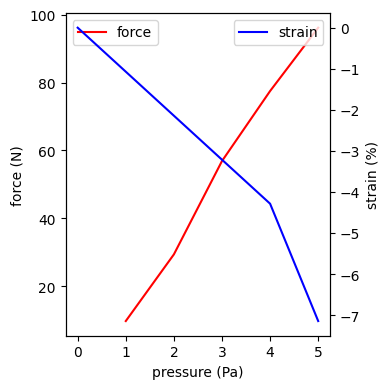

In [303]:
p = [1, 2, 3, 4, 5]
f = np.array([1, 3, 5.8, 7.9, 9.8])*9.81
lp = [0, 4, 5]
strain = (np.array([0.28, 0.268, 0.26])-0.28)/0.28*100
fig, ax1 = plt.subplots(figsize=(4, 4))
ax2 = ax1.twinx()
ax1.set_xlabel('pressure (Pa)')
ax1.plot(p, f, label="force", color='r')
ax2.plot(lp, strain, label="strain", color='b')
ax2.set_ylabel('strain (%)')
ax1.set_ylabel('force (N)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()


In [321]:
((40-(12/2))**2+(50**2))**0.5


28.3
22
21.5

print((21.5-28.3)/28.3)

k = (0.5*9.81*0.16)/np.deg2rad(30)
print(k)

-0.2402826855123675
1.4988575920622338


In [134]:
a = 50
x = 74.16
l0 = sqrt(a**2+x**2-2*a*x*cos(np.deg2rad(120)))
l1 = sqrt(a**2+x**2-2*a*x*cos(np.deg2rad(170)))
s= (l1-l0)/l0
print(f"l0: {l0}, l1: {l1}, strain: {s}")

l0: 108.202151549773, l1: 123.705456210866, strain: 0.143280927773067
